#Titanic Dataset Analysis: EDA and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Exploratory Data Analysis (EDA)
### Objective:
- Analyze dataset to predict whether a passenger survives based on features such as Class, Sex, Age, etc.

## Understanding the data
- The first step in EDA is to get familiar with your dataset. This involves:

  - loading the dataset. The Titanic dataset and  display the first few rows and get a visual sense of the data.


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Checking data types: Use df.info() or df.dtypes to examine the data types of each column. Note that some variables, like 'Survived', 'Pclass', 'Sex', and 'Embarked', may be listed as numerical or object types, but should be treated as categorical during analysis.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_category = df[["Survived","Pclass", "Sex","Embarked"]]
df_category.info()
df_numerical = df[["Age","Fare","SibSp", "Parch"]]
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Embarked  889 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.describe(), df["Sex"].describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
 count      891
 unique       2
 top       male
 freq       5

#### Checking for missing values: Use df.isnull().sum() to count the number of missing values in each column. Columns like 'Age', 'Cabin', and 'Embarked' commonly have missing values.


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Examining unique counts: Use df.nunique() to count the unique values in each column, especially useful for categorical features.

In [ ]:
df_category.nunique()

,0
Survived,2
Pclass,3
Sex,2
Embarked,3


# Analyzing individual features (univariate analysis)
- Survival distribution: Use sns.countplot(x='Survived', data=df) to visualize the distribution of survivors and non-survivors. You'll likely observe that the majority of passengers did not survive.


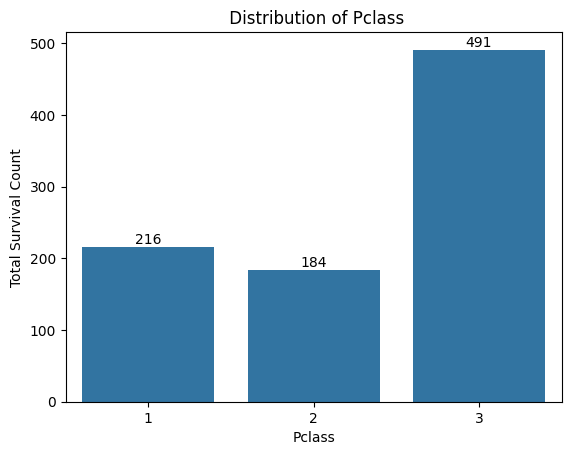

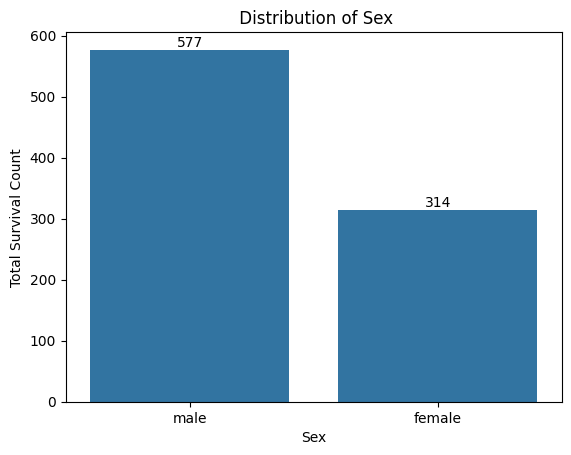

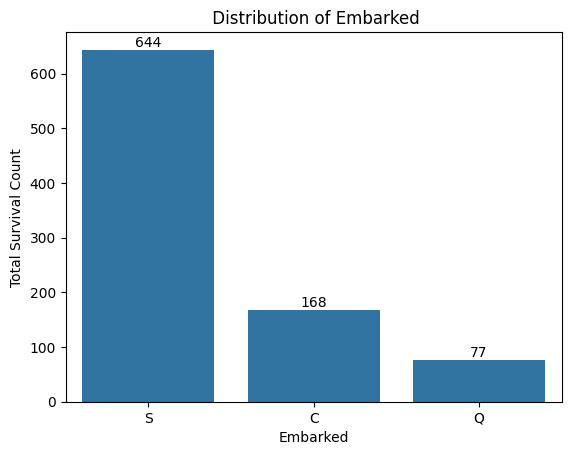

In [ ]:
for i in df_category.columns[1:]:
  sns.countplot(x=i, data=df_category)
  plt.title(f" Distribution of {i}")
  plt.bar_label(plt.gca().containers[0])
  plt.xlabel(f"{i}")
  plt.ylabel("Total Survival Count")
  plt.show()


- Analyzing the distribution of Passenger class to see the number of passengers in each class. Over 50% of the passengers were in 3rd class.
Age distribution: Use a histogram (sns.histplot(data=df, x='Age', kde=True)) to visualize the distribution of ages. You might find peaks in the 20s and 30s.
Fare distribution: Similarly, visualize the distribution of 'Fare' using a histogram or box plot. You might notice a wide range of fares and potential outliers.


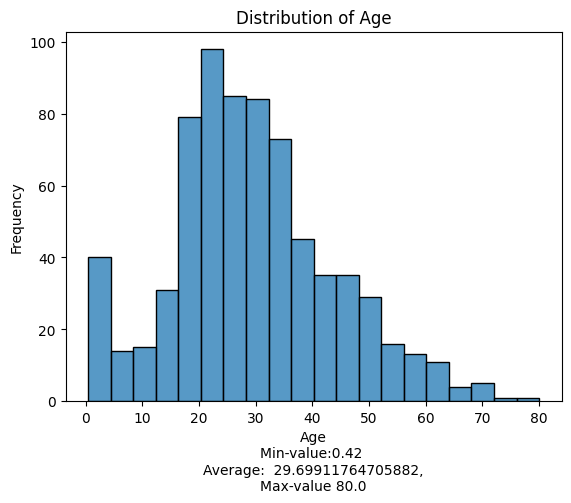

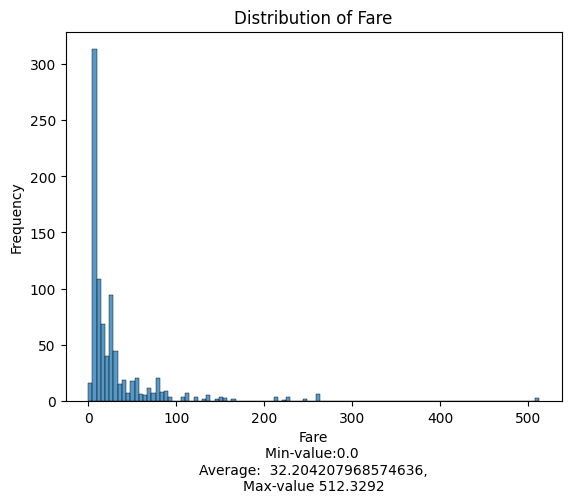

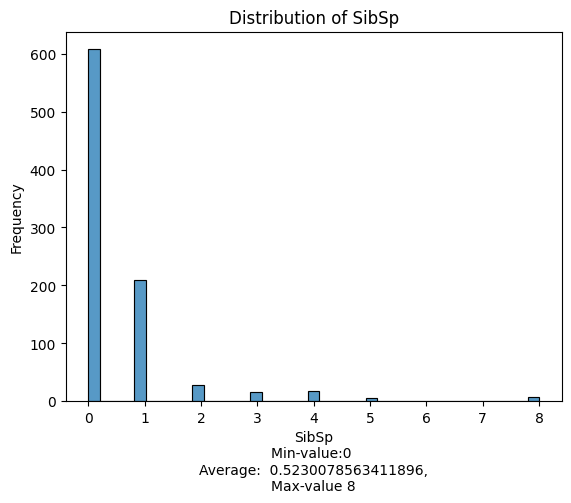

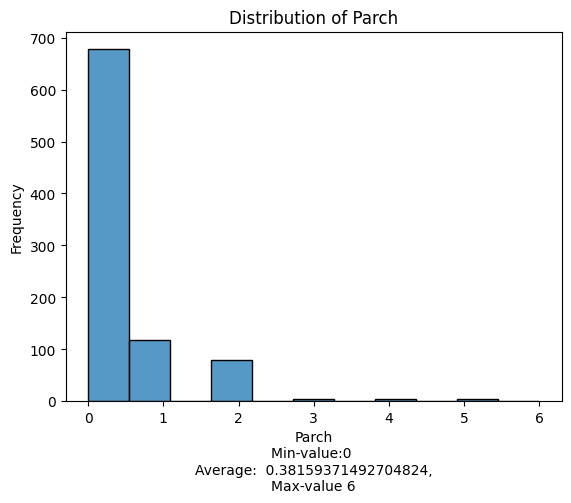

In [ ]:
for col in df_numerical.columns:
  sns.histplot(data=df_numerical, x=col, fill=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(f"{col}\nMin-value:{df_numerical[col].min()} \nAverage:  {df_numerical[col].mean()},\nMax-value {df_numerical[col].max()}")
  plt.ylabel("Frequency")
  plt.show()

# Heat map: Visualize correlation of Dataset on Numerical Values.

<Axes: >

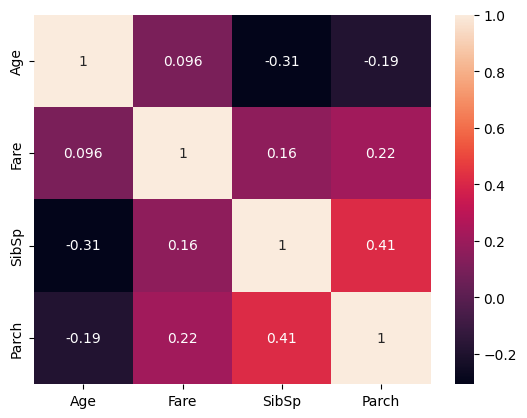

In [ ]:
sns.heatmap(df_numerical.corr(), annot=True)

 - As visualize above:
  - There is more positive correlation b/w SibSp and Parch
  - There is low/negative correlation b/w Age and Parch/SibSp

- Obtaining descriptive statistics: Use df.describe() to generate summary statistics for numerical variables (mean, standard deviation, min, max, quartiles). You might find that the average age was ~29.5 years and that fares varied widely. You may also find that about 38.6% of passengers in this dataset survived, which is similar to the overall survival rate of 32%.


In [ ]:
data = pd.read_csv("Titanic-Dataset.csv")
for col in data.columns[1:]:
  print(data[[col]].describe())

         Survived
count  891.000000
mean     0.383838
std      0.486592
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
           Pclass
count  891.000000
mean     2.308642
std      0.836071
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000
                       Name
count                   891
unique                  891
top     Dooley, Mr. Patrick
freq                      1
         Sex
count    891
unique     2
top     male
freq     577
              Age
count  714.000000
mean    29.699118
std     14.526497
min      0.420000
25%     20.125000
50%     28.000000
75%     38.000000
max     80.000000
            SibSp
count  891.000000
mean     0.523008
std      1.102743
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      8.000000
            Parch
count  891.000000
mean     0.381594
std      0.806057
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max

# Analyzing relationships between features (multivariate analysis)

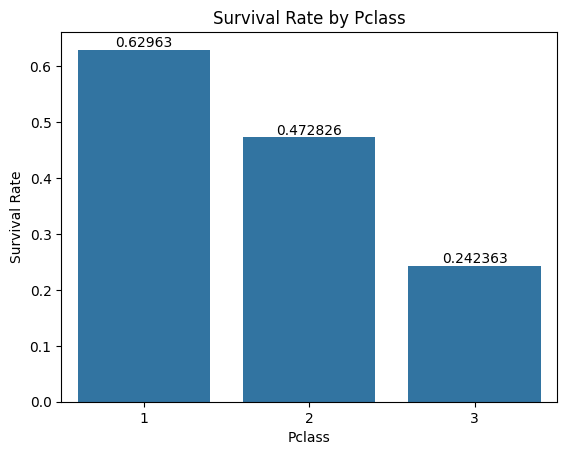

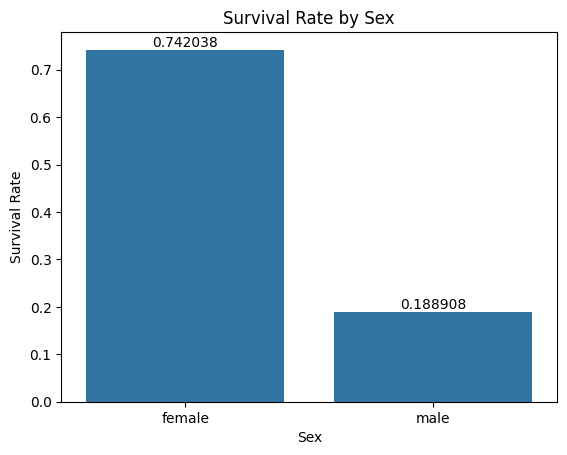

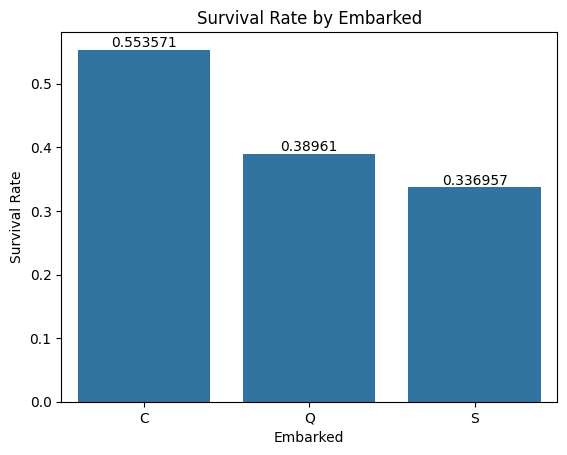

/tmp/ipython-input-2334239432.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(col)["Survived"].mean()


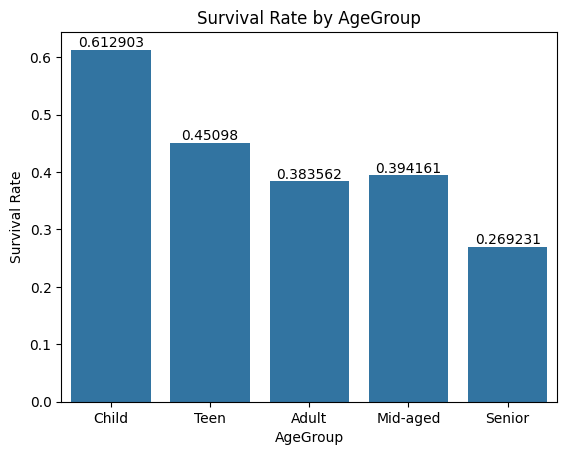

In [ ]:
for col in df.columns[1:]:
  if col == "AgeGroup" or col == "Embarked" or col == "Sex" or col == "Pclass":
    survival_rate = df.groupby(col)["Survived"].mean()
    sns.barplot(x=survival_rate.index, y=survival_rate.values)
    plt.bar_label(plt.gca().containers[0])
    plt.title(f"Survival Rate by {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Survival Rate")
    plt.show()

- Survival by age: Create age categories (e.g., child, young adult, adult, elderly) and then visualize survival rates within each category. You might find that children had a higher survival rate (54.4%) and seniors had the lowest (19.2%).
- Survival by gender: Visualize survival rates based on gender using a grouped bar chart or a count plot with hue='Survived'.
You'll observe a significant disparity, with women having a much higher survival rate (74.2%) compared to men (19.0%), confirming the "women and children first" protocol.

- Survival by passenger class: Similarly, analyze survival rates by 'Pclass'. You'll see that higher passenger classes (1st and 2nd) had significantly better survival chances than 3rd class passengers.
- Survival by embarkation port: Explore the relationship between the port of embarkation and survival rate.

# Correlation Analysis:
- Correlation analysis: Use a heatmap to visualize the correlations between numerical features, like 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare'.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


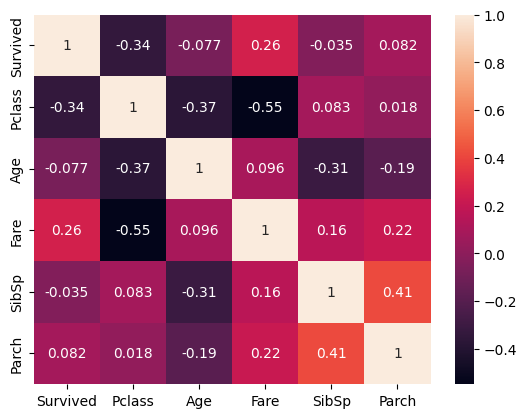

In [ ]:
sns.heatmap(df[["Survived","Pclass","Age","Fare","SibSp", "Parch"]].corr(), annot=True)
df.head()


## Analysis
- Positive Correlation:
 - midium - SibSp and Parch = 0.410
 - mid-low - SibSp and Fare = 0.160
 - Low - Fare and Age = 0.096
- Negative Correlation:
 - Mid - Survived and Age = -0.077
 - Mid-low - Pclass and Fare = -0.550
- In terms of Surviving:
 - There is negative relationship btw Surviving and Passernger Class.
 - There is a weak relationship btw Surviving and Fare/Parch
 - Survive ->(0.260)Fare->(0.22)Parch->(0.41)SibSp->(0.16)Fare

 ## Results:
- You'll see a strong negative correlation between 'Pclass' and 'Survived', meaning lower-class passengers had a higher risk of not surviving. A positive correlation exists between 'Fare' and 'Survived'.

## Key insights from EDA
 - Survival was heavily influenced by gender, with women being prioritized for lifeboats.
 - Passenger class played a significant role, with higher classes having better survival rates.
 - Age was also a factor, with children having a higher survival rate than adults or seniors.
Fare paid and family size also showed relationships with survival rates.


# 2. Feature engineering:
- Feature engineering involves creating or modifying features to improve model performance. In the context of the Titanic dataset, this involves several steps:

####Handling missing values
- Age: The 'Age' column often has missing values. You can impute these missing values using the mean, median, or a more sophisticated method like K-Nearest Neighbors imputation.
- Embarked: This categorical feature may also have missing values. You can impute these by using the most frequent value (mode) of the column.

- Cabin: This column has a large number of missing values and might be best dropped or used to create a new feature representing the deck.



In [12]:
import pandas as pd

def clean_titanic_data(df):
  df["Age"] = df["Age"].fillna(df["Age"].mean())
  df.drop(columns=["PassengerId","Cabin", "Ticket"], inplace=True)
  df["Sex"] = df["Sex"].map({"male":0, "female": 1})
  return df

data = pd.read_csv("Titanic-Dataset.csv")
data = clean_titanic_data(data)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,C


###Creating new features
- Family Size: Combine 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) to create a new feature called 'FamilySize'. This can provide more insight into the impact of family on survival chances.
- IsAlone: Create a binary feature indicating whether a passenger was traveling alone or not, based on 'FamilySize'.
- Age Group: Categorize the 'Age' feature into groups (e.g., child, young adult, adult, elderly). This can capture non-linear relationships with survival and might be more robust to outliers.
Transforming features


In [13]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data["IsAlone"] = data["FamilySize"].apply(lambda x:1 if x ==1 else 0)
year = [0,9,17,39,59,120]
labels = ["child", "Teen", "y_adult", "m_adult", "senior"]
data["AgeGroup"] = pd.cut(data["Age"],bins=year,labels=labels)
data = pd.get_dummies(data,columns=["Embarked"], drop_first= True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeGroup,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0,y_adult,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0,y_adult,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,1,y_adult,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,0,y_adult,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,1,y_adult,False,True


- Title: Extract titles from the 'Name' column (e.g., Mr., Mrs., Miss, Master). Titles can reveal social status and, consequently, have an impact on survival rates.

In [14]:
data["Title"] = data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
unique_title = data["Title"].unique()

def simplify_title(title):
    royalty = ['Don', 'Sir', 'Lady', 'the Countess', 'Jonkheer', 'Prince']
    military = ['Major', 'Col', 'Capt']
    professional = ['Dr', 'Rev']
    if title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in royalty:
        return 'Royalty'
    elif title in military:
        return 'Military'
    elif title in professional:
        return 'Professional'
    else:
        return title  # Keep common titles like Mr, Mrs, Miss, Master

data["TitleGroup"] = data["Title"].apply(simplify_title)
data = pd.get_dummies(data, columns=["TitleGroup"], drop_first= True)
data.drop(columns=["Name", "Title"], inplace=True)
data.head(5)




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeGroup,Embarked_Q,Embarked_S,Title_Group_Military,Title_Group_Miss,Title_Group_Mr,Title_Group_Mrs,Title_Group_Professional,Title_Group_Royalty
0,0,3,0,22.0,1,0,7.2500,2,0,y_adult,False,True,False,False,True,False,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,y_adult,False,False,False,False,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,1,1,y_adult,False,True,False,True,False,False,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,y_adult,False,True,False,False,False,True,False,False
4,0,3,0,35.0,0,0,8.0500,1,1,y_adult,False,True,False,False,True,False,False,False


In [20]:
df = data.copy()

df = pd.get_dummies(df, columns=["AgeGroup"], drop_first = True)
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,...,Title_Group_Military,Title_Group_Miss,Title_Group_Mr,Title_Group_Mrs,Title_Group_Professional,Title_Group_Royalty,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
0,0,3,0,22.0,1,0,7.2500,2,0,False,...,False,False,True,False,False,False,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,False,...,False,False,False,True,False,False,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,...,False,True,False,False,False,False,False,True,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,False,...,False,False,False,True,False,False,False,True,False,False


###Transforming Features
- Encoding categorical features: Machine learning algorithms require numerical input, so categorical features like 'Sex', 'Embarked', 'Pclass', and the newly created 'Title' need to be converted to numerical representations. One-hot encoding is a common method for this, creating new binary columns for each category.
- Feature scaling: Numerical features like 'Age' and 'Fare' may have different scales, which can bias certain models. Scaling techniques like Standardization or Min-Max scaling can normalize these features to a uniform range (e.g., 0 to 1).
- Logarithmic transformation: If a numerical feature like 'Fare' is skewed, a logarithmic transformation can help normalize the distribution and reduce the impact of outliers.

####Feature selection
- Dropping irrelevant features: Features like 'PassengerId', 'Name', 'Ticket', and potentially 'Cabin' might not be directly useful for predicting survival and can be dropped.
- Correlation analysis: Use correlation analysis to identify features that are strongly correlated with the target variable ('Survived') and consider removing features that have low correlation or are redundant.


- Dropping irrelevant features: Features like 'PassengerId', 'Name', 'Ticket', and potentially 'Cabin' might not be directly useful for predicting survival and can be dropped.
- Correlation analysis: Use correlation analysis to identify features that are strongly correlated with the target variable ('Survived') and consider removing features that have low
correlation or are redundant.
Conclusion.


By thoroughly applying EDA, you gain a deep understanding of the Titanic dataset, uncovering relationships between features and survival. This understanding then guides the feature engineering process, where you create and refine features to improve the performance of your machine learning model. These two crucial steps are essential for building effective and accurate models for predicting Titanic passenger survival.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
